<a href="https://colab.research.google.com/github/ambreenraheem/Deep-Learning/blob/main/multi_layer2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ambreen Abdul Raheem
# Microsoft Power BI Data Analyst(Upwork Freelancer)
Date: 4-July-2025

## Now a days working on Deep Learning


**🚨 Taxi Trip Fraud Detection with Deep Learning! 🚨**

Excited to share my latest project where I applied Deep Learning on real-world NYC Yellow Taxi dataset to detect fraudulent trips using anomaly detection techniques.

✨ Key Highlights:\
✅ Cleaned & preprocessed millions of taxi ride records\
✅ Engineered meaningful features like trip duration, fare per mile, and tip percentage\
✅ Built an Autoencoder Neural Network to learn normal trip patterns\
✅ Detected potential frauds based on reconstruction errors\
✅ Visualized anomalies and generated a clean dataset ready for further BI reporting

**💡 This project taught me:**\
🔍 How to apply Deep Learning beyond traditional classification tasks\
📊 How to work with large, real-world datasets in Python\
⚡ How to connect data science with real business impact (fraud prevention!)

🚀 Next step: Planning to integrate this clean dataset into Power BI dashboards to provide actionable fraud insights.

🔗 The full cleaned code & process is available on my GitHub (https://github.com/ambreenraheem/Deep-Learning/tree/main)


# About Dataset

TLC Trip Record Data

Yellow and green taxi trip records include fields capturing pickup and drop-off dates/times, pickup and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts. The data used in the attached datasets were collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers authorized under the Taxicab & Livery Passenger Enhancement Programs (TPEP/LPEP). The trip data was not created by the TLC, and TLC makes no representations as to the accuracy of these data.

**Click on the link:** (https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

#### 1. **"I installed the pyarrow and fastparquet libraries to enable my Python environment to read and write Parquet files, which are commonly used for storing large datasets in a fast and efficient way. Pandas relies on these libraries when working with .parquet formats. This step is essential when you're dealing with big data workflows or cloud-based data pipelines."**

In [2]:
!pip install --upgrade pyarrow fastparquet

 Important point! While GPUs are widely used for image processing, their benefits extend to accelerating other types of numerical computations, including training neural networks on tabular data like the taxi data you are working with.

TensorFlow, the library you are using for the autoencoder model, can leverage the parallel processing capabilities of a GPU to speed up the training process, even though your data is not image-based. So, using a GPU can still significantly reduce the time it takes to train your model.

##### 2. Load the Data

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# February data
filedata = '/content/yellow_tripdata_2025-02.parquet'
df = pd.read_parquet(filedata)

In [4]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,cbd_congestion_fee
0,2,2025-02-01 00:12:18,2025-02-01 00:32:33,3.0,3.12,1.0,N,246,79,1,19.80,1.00,0.5,5.11,0.0,1.0,30.66,2.5,0.0,0.75
1,2,2025-02-01 00:40:04,2025-02-01 00:49:15,1.0,1.40,1.0,N,114,79,1,10.00,1.00,0.5,3.15,0.0,1.0,18.90,2.5,0.0,0.75
2,1,2025-02-01 00:06:09,2025-02-01 00:11:51,0.0,0.40,1.0,N,211,144,1,6.50,4.25,0.5,1.00,0.0,1.0,13.25,2.5,0.0,0.75
3,1,2025-02-01 00:15:13,2025-02-01 00:20:19,0.0,0.70,1.0,N,113,249,1,7.20,4.25,0.5,2.00,0.0,1.0,14.95,2.5,0.0,0.75
4,2,2025-02-01 00:02:52,2025-02-01 00:20:25,1.0,4.19,1.0,N,113,263,1,19.80,1.00,0.5,5.11,0.0,1.0,30.66,2.5,0.0,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3577538,2,2025-02-28 23:39:09,2025-03-01 00:05:17,NaN,13.73,NaN,None,209,127,0,47.56,0.00,0.5,0.00,0.0,1.0,52.31,NaN,NaN,0.75
3577539,2,2025-02-28 23:45:00,2025-02-28 23:56:22,NaN,1.39,NaN,None,4,234,0,-4.75,0.00,0.5,0.00,0.0,1.0,2.36,NaN,NaN,0.75
3577540,2,2025-02-28 23:28:19,2025-02-28 23:38:18,NaN,1.14,NaN,None,107,4,0,12.68,0.00,0.5,0.00,0.0,1.0,17.43,NaN,NaN,0.75
3577541,2,2025-02-28 23:46:52,2025-03-01 00:02:48,NaN,7.43,NaN,None,50,243,0,-4.75,0.00,0.5,0.00,0.0,1.0,5.17,NaN,NaN,0.75


### Converting TLC Taxi dataset in csv file for future use

In [5]:
# converting dataset in csv file for future use

df.to_csv(filedata.replace('.parquet', '.csv'), index=False)
print("Cleaned & labeled data saved to csv:", filedata)

Cleaned & labeled data saved to csv: /content/yellow_tripdata_2025-02.parquet


In [6]:
print("Shape of Data: ", df.shape)

Shape of Data:  (3577543, 20)


In [7]:
# Load dataset with only relevant columns for fraud detection
taxi = pd.read_parquet(filedata, columns=[
    'tpep_pickup_datetime', 'tpep_dropoff_datetime',
    'trip_distance', 'fare_amount', 'passenger_count',
    'tip_amount', 'total_amount'
])

In [8]:
print('Origional Data: ', taxi.shape)

Origional Data:  (3577543, 7)


#### 3. Cleaning

In [9]:
# ------------------- Step 3: Cleaning ----------------------

# Remove invalid or impossible records
taxi = taxi[(taxi['trip_distance'] >= 0) & (taxi['fare_amount'] > 0) & (taxi['total_amount'] > 0)]
taxi = taxi[(taxi['passenger_count'] > 0) & (taxi['passenger_count'] <= 6)]

print("Cleaned Data Shape:", taxi.shape)

Cleaned Data Shape: (2692661, 7)


In [10]:
taxi

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,fare_amount,passenger_count,tip_amount,total_amount
0,2025-02-01 00:12:18,2025-02-01 00:32:33,3.12,19.8,3.0,5.11,30.66
1,2025-02-01 00:40:04,2025-02-01 00:49:15,1.40,10.0,1.0,3.15,18.90
4,2025-02-01 00:02:52,2025-02-01 00:20:25,4.19,19.8,1.0,5.11,30.66
5,2025-02-01 00:33:47,2025-02-01 00:41:49,1.57,10.0,1.0,3.15,18.90
6,2025-02-01 00:37:12,2025-02-01 00:39:49,0.30,4.4,1.0,3.00,13.15
...,...,...,...,...,...,...,...
2770601,2025-02-28 23:28:24,2025-02-28 23:43:23,2.03,14.9,2.0,3.00,23.65
2770602,2025-02-28 23:58:29,2025-03-01 00:07:49,1.06,10.0,2.0,0.00,15.75
2770603,2025-02-28 23:12:34,2025-02-28 23:50:43,12.57,56.2,1.0,5.00,70.45
2770604,2025-02-28 23:00:51,2025-02-28 23:28:36,5.60,28.9,1.0,0.00,34.65


In [11]:
taxi.isnull().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
trip_distance,0
fare_amount,0
passenger_count,0
tip_amount,0
total_amount,0


#### 4.  Feature Engineering

In [12]:
# ------------------- Step 4: Feature Engineering ----------------------

# Calculate trip duration in minutes
taxi['tpep_pickup_datetime'] = pd.to_datetime(taxi['tpep_pickup_datetime'])
taxi['tpep_dropoff_datetime'] = pd.to_datetime(taxi['tpep_dropoff_datetime'])
taxi['trip_duration'] = (taxi['tpep_dropoff_datetime'] - taxi['tpep_pickup_datetime']).dt.total_seconds() / 60

taxi= taxi[(taxi['trip_duration'] > 0) & (taxi['trip_duration'] < 180)]  # Max 3-hour trips only

# Fare per Mile (avoid division by zero)
taxi['fare_per_mile'] = taxi['fare_amount'] / taxi['trip_distance'].replace(0, np.nan)
taxi['fare_per_mile'].fillna(0, inplace=True)

# Tip Percentage
taxi['tip_percent'] = taxi['tip_amount'] / taxi['fare_amount'] * 100

# Final Features for Model
features = taxi[['trip_distance', 'fare_amount', 'passenger_count', 'trip_duration', 'fare_per_mile', 'tip_percent']]

/tmp/ipython-input-12-1292085329.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi['fare_per_mile'] = taxi['fare_amount'] / taxi['trip_distance'].replace(0, np.nan)
/tmp/ipython-input-12-1292085329.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  taxi['fare_per_mile'].fillna(

#### 5. Scaling

In [13]:
# ------------------- Step 5: Scaling ----------------------

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

You cannot directly use accuracy as a metric for compiling this autoencoder model.

Autoencoders are unsupervised learning models primarily used for dimensionality reduction or anomaly detection. They are trained to reconstruct their input, and the goal is to minimize the reconstruction loss (like Mean Squared Error - MSE in this case). Accuracy is a metric used for classification tasks, where you are trying to predict a specific class label.

Since your autoencoder is not performing a classification task, accuracy is not a relevant metric to evaluate its performance. The loss (MSE) is the appropriate metric here, as it measures how well the autoencoder is reconstructing the input data.

If you were to use this autoencoder for anomaly detection, you would typically set a threshold on the reconstruction error to identify anomalies, rather than using accuracy.

#### 6. Autoencoder Model

In [14]:
# ------------------- Step 6: Autoencoder Model ----------------------

input_dim = X_scaled.shape[1]

model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(input_dim,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(input_dim)  # Output same dimension as input
])

model.compile(optimizer='adam', loss='mse')

# Train only on normal data (assuming majority is normal)
model.fit(X_scaled, X_scaled, epochs=50, batch_size=512, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4723/4723 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.1336 - val_loss: 0.0087
Epoch 2/50
4723/4723 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.1920 - val_loss: 0.0173
Epoch 3/50
4723/4723 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step - loss: 0.1337 - val_loss: 0.0112
Epoch 4/50
4723/4723 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1212 - val_loss: 0.0059
Epoch 5/50
4723/4723 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step - loss: 0.1814 - val_loss: 0.0016
Epoch 6/50
4723/4723 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.1109 - val_loss: 0.0043
Epoch 7/50
4723/4723 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0381 - val_loss: 0.0060
Epoch 8/50
4723/4723 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.2518 - val_loss: 0.0031
Epoch 9/50
4723/4723 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - loss: 0.0916 - val_loss: 0.0010
Epoch 10/50
4723/4723 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.0324 - val_loss: 0.0022
Epoch 11/50
4723/4723 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - loss: 0.0624 - val_loss: 0.0065
Epoch 12/50
4723/47

#### 7. Anomaly Detection

In [15]:
# ------------------- Step 7: Anomaly Detection ----------------------

reconstructions = model.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Set dynamic threshold
threshold = np.mean(mse) + 3 * np.std(mse)

# Label Frauds
taxi['mse'] = mse
taxi['fraud_flag'] = taxi['mse'] > threshold

print("Potential Frauds Detected:", taxi['fraud_flag'].sum())



83957/83957 ━━━━━━━━━━━━━━━━━━━━ 114s 1ms/step
Potential Frauds Detected: 1


/tmp/ipython-input-15-2184765341.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi['mse'] = mse
/tmp/ipython-input-15-2184765341.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi['fraud_flag'] = taxi['mse'] > threshold


#### 8. Improves Our fraud detection logic by ensuring the data is safely handled

**"This block improves our fraud detection logic by ensuring the data is safely handled, calculating the reconstruction error, setting a dynamic threshold for anomalies, and flagging potential frauds without warnings. It’s clean, professional, and scalable for large datasets or production use."**



In [16]:
# Step 1: Make a clean copy of the original DataFrame
taxi_copy = taxi.copy()

# Step 2: Reconstruct and calculate reconstruction error (MSE)
reconstructions = model.predict(X_scaled)
mse = np.mean(np.power(X_scaled - reconstructions, 2), axis=1)

# Step 3: Add MSE to the DataFrame
taxi_copy['mse'] = mse

# Step 4: Compute a dynamic threshold (mean + 3*std)
threshold = np.mean(mse) + 3 * np.std(mse)
print(f"Anomaly Threshold: {threshold:.4f}")

# Step 5: Flag frauds
taxi_copy['fraud_flag'] = taxi_copy['mse'] > threshold

# Step 6: Report result
num_frauds = taxi_copy['fraud_flag'].sum()
print(f"Now once again for confirmation of Potential Frauds Detected: {num_frauds}")

# Step 7 (Optional): See top 5 frauds
print(taxi_copy[taxi_copy['fraud_flag'] == True].head())


83957/83957 ━━━━━━━━━━━━━━━━━━━━ 114s 1ms/step
Anomaly Threshold: 58699.6284
Now once again for confirmation of Potential Frauds Detected: 1
        tpep_pickup_datetime tpep_dropoff_datetime  trip_distance  \
2030762  2025-02-21 17:28:43   2025-02-21 17:53:04            2.2   

         fare_amount  passenger_count  tip_amount  total_amount  \
2030762    132531.36              1.0         0.0     132555.41   

         trip_duration  fare_per_mile  tip_percent           mse  fraud_flag  
2030762          24.35   60241.527273          0.0  3.206475e+07        True  


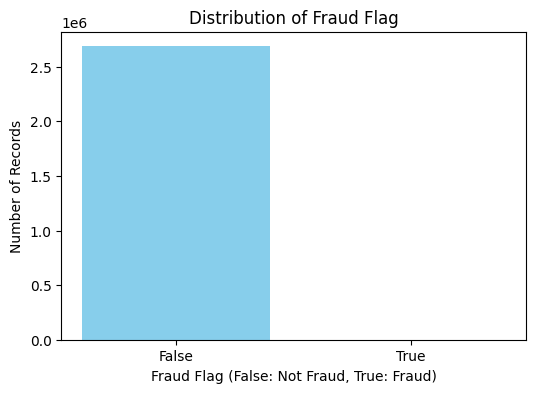

In [18]:
fraud_counts = taxi['fraud_flag'].value_counts()

plt.figure(figsize=(6, 4))
plt.bar(fraud_counts.index.astype(str), fraud_counts.values, color=['skyblue', 'salmon'])
plt.xlabel('Fraud Flag (False: Not Fraud, True: Fraud)')
plt.ylabel('Number of Records')
plt.title('Distribution of Fraud Flag')
plt.xticks([0, 1], ['False', 'True'])
plt.show()